# Testing purpouses only

This notebook does not belong to the project pipeline, its use is only intended for single component experimentation.

In [2]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga tu frame BGR
img_bgr = cv2.imread("image_no_border.png")

assert img_bgr is not None, "No se pudo leer la imagen"
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


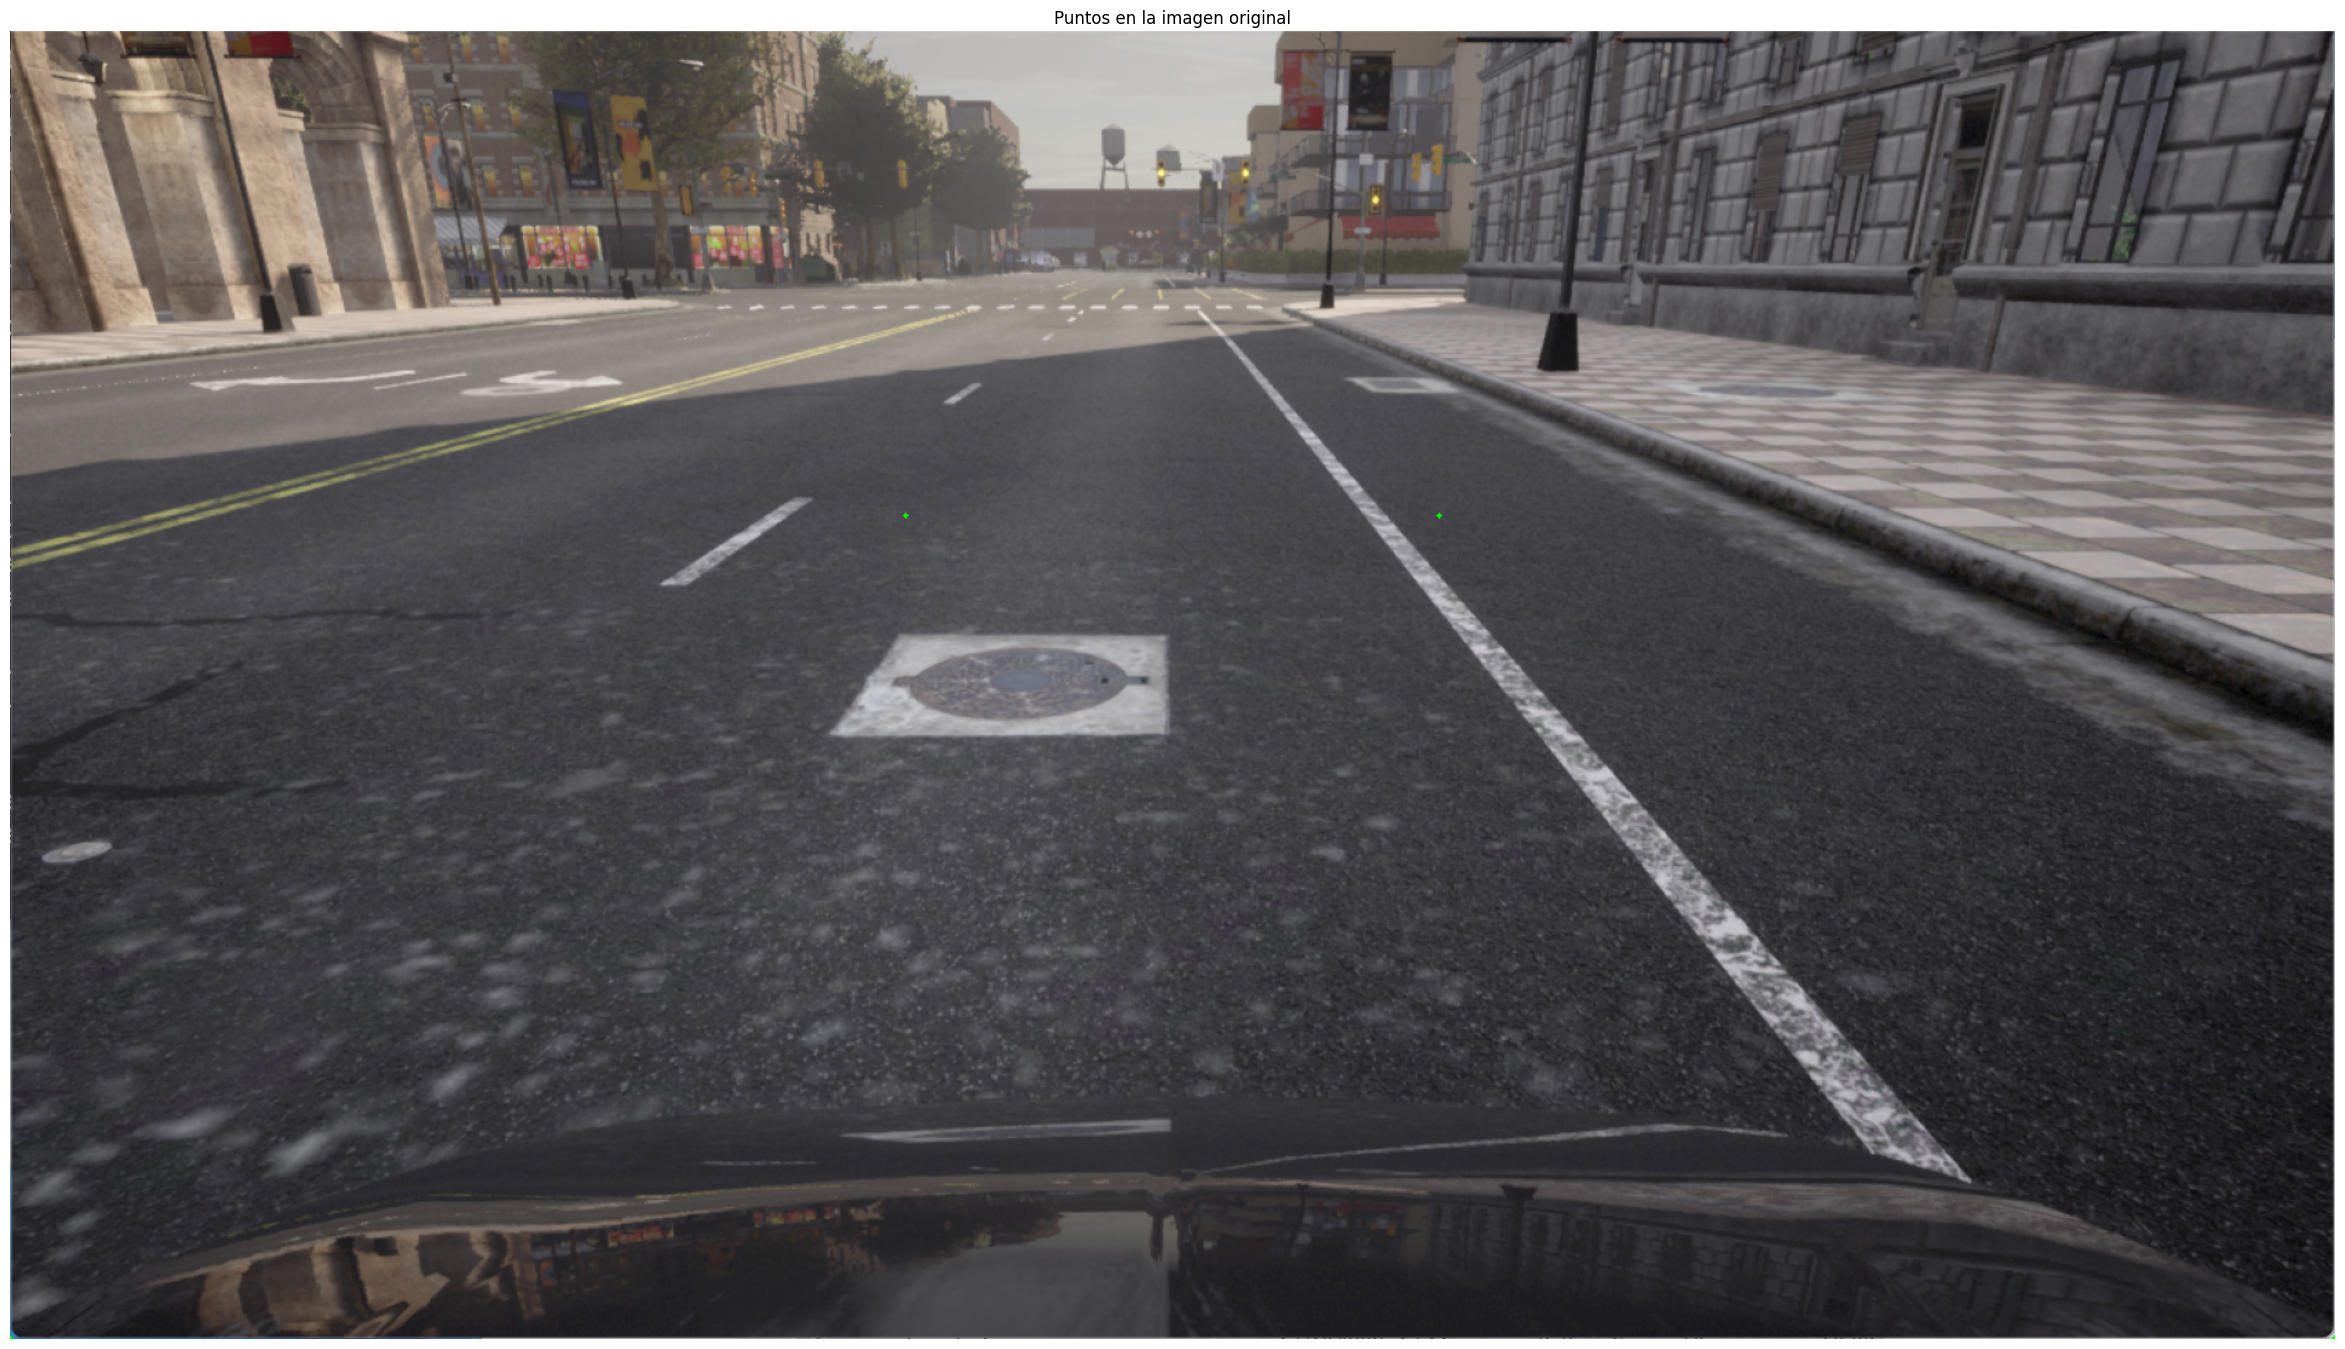

In [ ]:

# normalize imag 

# 1) Puntos en la imagen (orden: sup-izq, sup-der, inf-der, inf-izq)
src = np.float32([
    [ 740, 400],  # top-left
    [ (img.shape[1]-1) / 2 + (np.abs(((img.shape[1]-1) / 2) - 740)), 400],  # top-right
    [ img.shape[1]-1, img.shape[0]-1],  # bottom-right
    [ 0, img.shape[0]-1]   # bottom-left
])

# Create a copy of the image to avoid modifying the original
img_with_points = img.copy()

# mostrar los puntos en la imagen original
for point in src:
    # Convert float coordinates to integers for cv2.circle
    cv2.circle(img_with_points, (int(point[0]), int(point[1])), 2, (0, 255, 0), -1)

# Use matplotlib for display in Jupyter
plt.figure(figsize=(30, 20))
plt.imshow(img_with_points)
plt.title("Puntos en la imagen original")
plt.axis('off')
plt.show()


In [4]:
# 2) Tamaño de la vista cenital (en píxeles) que quieres
W, H = 450, 1000
# 3) Esquinas destino (rectángulo)
dst = np.float32([
    [0, 0],
    [W-1, 0],
    [W-1, H-1],
    [0, H-1]
])

# 4) Homografía y warp
Hmat = cv2.getPerspectiveTransform(src, dst)

# Save the homography matrix if needed
np.save("homography_matrix.npy", Hmat)

topdown = cv2.warpPerspective(img, Hmat, (W, H), flags=cv2.INTER_LINEAR)

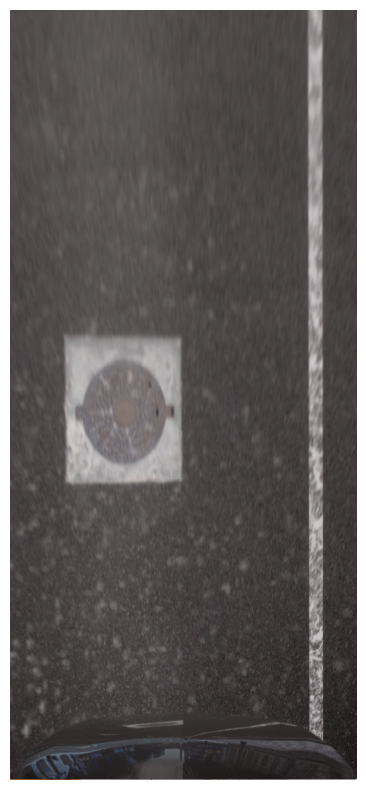

In [5]:
# show image embedded in notebook


plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(topdown, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()